# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
A1 = main.random_matrix_Ab(10)
A2 = main.random_matrix_Ab(20)
A3 = main.random_matrix_Ab(50)
A4 = main.random_matrix_Ab(100)
A5 = main.random_matrix_Ab(1000)

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

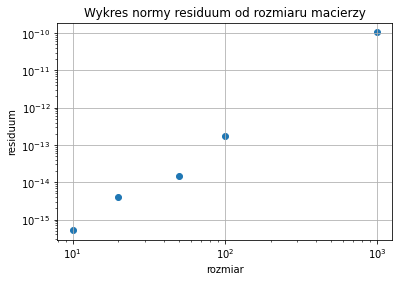

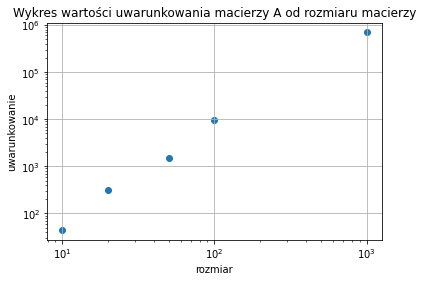

In [3]:
tab_matrix = [A1, A2, A3, A4, A5]
tab_x = []
tab_norm = []
tab_cond = []
for matrix in tab_matrix:
    x = np.linalg.solve(matrix[0], matrix[1])
    tab_x.append(x)
    tab_norm.append(main.residual_norm(matrix[0], x, matrix[1]))
    tab_cond.append(np.linalg.cond(matrix[0]))

matrix = [10, 20, 50, 100, 1000]
main.plt_scatter(matrix,tab_norm,"Wykres normy residuum od rozmiaru macierzy", "rozmiar", "residuum", "log","log")
main.plt_scatter(matrix,tab_cond,"Wykres wartości uwarunkowania macierzy A od rozmiaru macierzy", "rozmiar", "uwarunkowanie","log","log")


In [4]:
#Jak widać na wykresach powyżej wraz ze wzrostem rozmiaru macierzy rośnie uwarunkowanie i norma residuum macierzy.

In [5]:
max_value_A_10 = np.zeros((50,50))
max_value_A_100 = np.zeros((50,50))
max_value_A_1000 = np.zeros((50,50))
b = np.random.rand(50,)


for i in range (len(max_value_A_10)):
    for j in range(len(max_value_A_10[0])):
        max_value_A_10[i][j] = np.random.randint(1,10)
        max_value_A_100[i][j] = np.random.randint(1,100)
        max_value_A_1000[i][j] = np.random.randint(1,1000)
        
x10 = np.linalg.solve(max_value_A_10,b)   
x100 = np.linalg.solve(max_value_A_100,b)
x1000 = np.linalg.solve(max_value_A_1000,b)

print(f"Dla macierzy przyjmującej wartości do 10 norma residuum wynosi:\n{main.residual_norm(max_value_A_10, x10, b)}\nA wspólczynnik cond:\n{np.linalg.cond(max_value_A_10)}")
print(f"Dla macierzy przyjmującej wartości do 100 norma residuum wynosi:\n{main.residual_norm(max_value_A_100, x100, b)}\nA wspólczynnik cond:\n{np.linalg.cond(max_value_A_100)}")
print(f"Dla macierzy przyjmującej wartości do 1000 norma residuum wynosi:\n{main.residual_norm(max_value_A_1000, x1000, b)}\nA wspólczynnik cond:\n{np.linalg.cond(max_value_A_1000)}")

Dla macierzy przyjmującej wartości do 10 norma residuum wynosi:
1.6859770234258857e-14
A wspólczynnik cond:
880.7526995212482
Dla macierzy przyjmującej wartości do 100 norma residuum wynosi:
1.0032632811258642e-14
A wspólczynnik cond:
624.0188632841327
Dla macierzy przyjmującej wartości do 1000 norma residuum wynosi:
1.481492686280565e-14
A wspólczynnik cond:
490.628209901275


In [6]:
#Wartości macierzy nie mają znaczenia dla współczynnika uwarunkowania.

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [7]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




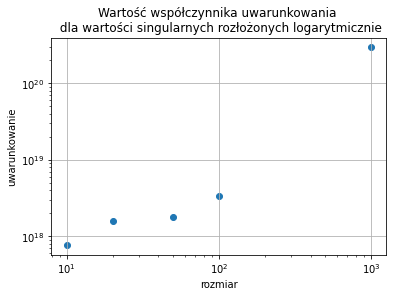

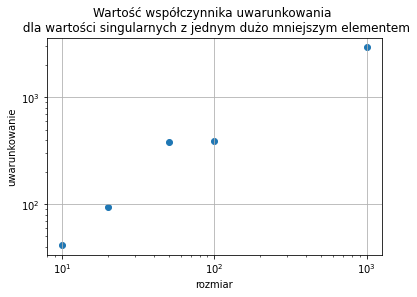

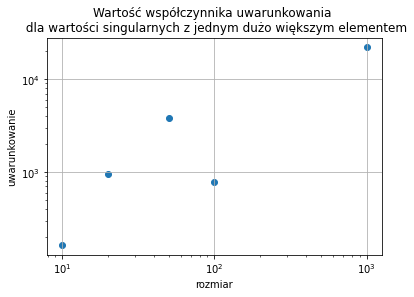

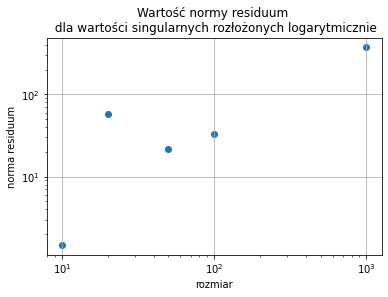

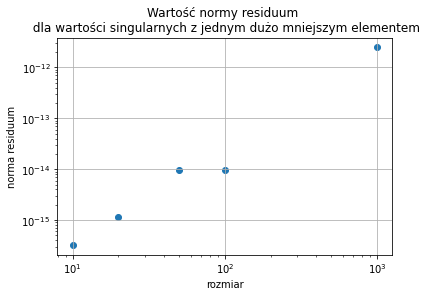

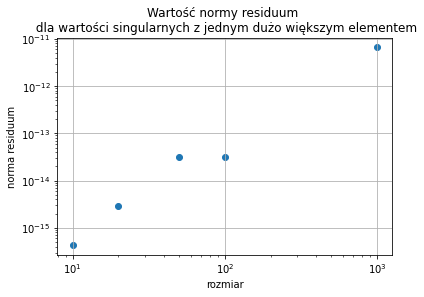

In [8]:
tab_size = [10, 20, 50, 100, 1000]

tab_cond_log = []
tab_cond_low = []
tab_cond_gre = []
tab_residuum_log = []
tab_residuum_low = []
tab_residuum_gre = []

for size in tab_size:
    A = main.random_matrix_Ab(size)[0]
    b = main.random_matrix_Ab(size)[1]

    log = np.flip(main.log_sing_value(size, 0, 100))
    A_log = main.create_matrix_from_A(A, log)
    tab_cond_log.append(np.linalg.cond(A_log))
    tab_residuum_log.append(main.residual_norm(A_log, np.linalg.solve(A_log, b), b))

    low = main.order_sing_value(size, 2, "low")
    A_low = main.create_matrix_from_A(A, low)
    tab_cond_low.append(np.linalg.cond(A_low))
    tab_residuum_low.append(main.residual_norm(A_low, np.linalg.solve(A_low, b), b))

    gre = main.order_sing_value(size,2, "gre")
    A_gre= main.create_matrix_from_A(A, gre)
    tab_cond_gre.append(np.linalg.cond(A_gre))
    tab_residuum_gre.append(main.residual_norm(A_gre, np.linalg.solve(A_gre, b), b))


main.plt_scatter(tab_size,tab_cond_log,"Wartość współczynnika uwarunkowania \n dla wartości singularnych rozłożonych logarytmicznie", "rozmiar", "uwarunkowanie", "log","log")
main.plt_scatter(tab_size,tab_cond_low,"Wartość współczynnika uwarunkowania \n dla wartości singularnych z jednym dużo mniejszym elementem", "rozmiar", "uwarunkowanie", "log","log")
main.plt_scatter(tab_size,tab_cond_gre,"Wartość współczynnika uwarunkowania \n dla wartości singularnych z jednym dużo większym elementem", "rozmiar", "uwarunkowanie", "log","log")
main.plt_scatter(tab_size,tab_residuum_log,"Wartość normy residuum \n dla wartości singularnych rozłożonych logarytmicznie", "rozmiar", "norma residuum", "log","log")
main.plt_scatter(tab_size,tab_residuum_low,"Wartość normy residuum \n dla wartości singularnych z jednym dużo mniejszym elementem", "rozmiar", "norma residuum", "log","log")
main.plt_scatter(tab_size,tab_residuum_gre,"Wartość normy residuum \n dla wartości singularnych z jednym dużo większym elementem", "rozmiar", "norma residuum", "log","log")

In [9]:
#Wskaźnik można przedstawić jako stosunek najwyższej wartości do najmniejszej w wektorze wartości singularnej 
#( cond = Smax/Smin) - co oznacza, że nie ma potrzeby wyliczać macierzy, aby to policzyć. 
#Współczynnik uwarunkowania jest dużo wyższy dla wartości singularnych rozłożonych logarytmicznie, podobnie jak wartość 
#normy residuum. Dla wartości singularnych z jednym dużo mniejszym lub większym elementem wartość uwarunkowania i normy 
#są podobne.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)